In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern, graycomatrix, graycoprops

In [2]:
dataset_path = "../input/socofing/SOCOFing/Real/"
image_files = [f for f in os.listdir(dataset_path) if f.lower().endswith('.bmp')]


In [3]:
if len(image_files) == 0:
    print("Klasörde .bmp uzantılı dosya bulunamadı!")
else:
    print(f"Bulunan {len(image_files)} adet .bmp dosyası.")

Bulunan 6000 adet .bmp dosyası.


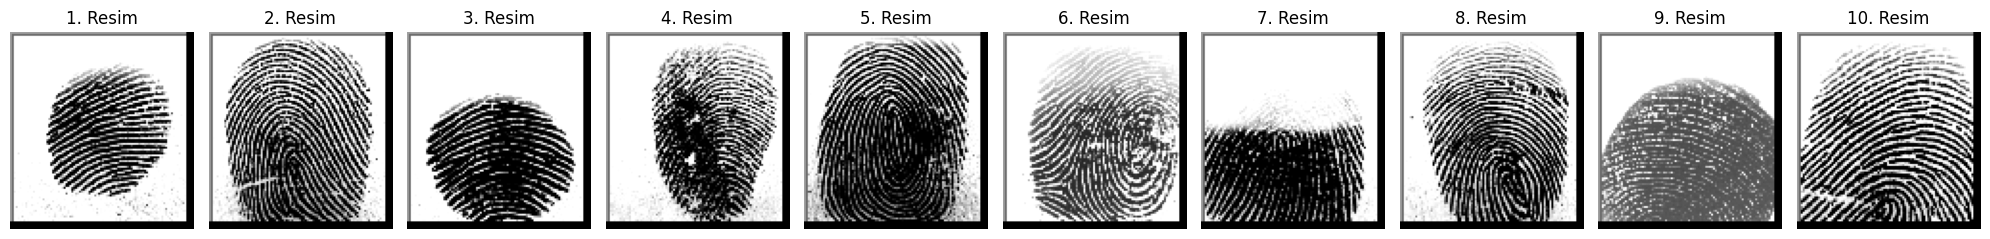

In [4]:
num_images_to_show = min(10, len(image_files))
plt.figure(figsize=(20, 4))

for i, image_file in enumerate(image_files[:num_images_to_show]):
    image_path = os.path.join(dataset_path, image_file)

    # gri tonlamada
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Görüntü okunamadı: {image_file}")
        continue

    # görüntüyü görselleştirme
    plt.subplot(1, num_images_to_show, i + 1)  # Tek satır ve num_images_to_show kadar sütun
    plt.imshow(image, cmap="gray")
    plt.title(f"{i + 1}. Resim")  # Kısa başlık
    plt.axis("off")

plt.tight_layout()
plt.show(block=True)

In [5]:
# LBP uygulanmış görüntüleri saklamak için liste
lbp_images = []

In [6]:
# LBP ve GLCM hesaplamalarını yapma
for image_file in image_files:
    image_path = os.path.join(dataset_path, image_file)

    # Görüntüyü okuma
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Görüntü okunamadı: {image_file}")
        continue

    # LBP uygulama
    radius = 1
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method="uniform")

    # LBP görüntüsünü normalize et (0-255 aralığına getir)
    lbp_normalized = (lbp / lbp.max()) * 255
    lbp_normalized = lbp_normalized.astype(np.uint8)

    # GLCM hesaplama
    glcm = graycomatrix(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

    # GLCM'den öznitelik çıkarımı
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]

    # LBP ve GLCM özniteliklerini listeye ekle
    lbp_images.append((image, lbp_normalized, image_file, contrast, correlation, homogeneity, energy))


In [7]:
# Görselleştirme
num_images_to_show = min(10, len(lbp_images))
plt.figure(figsize=(10, 5))  # Görüntülerin boyutunu ayarla


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

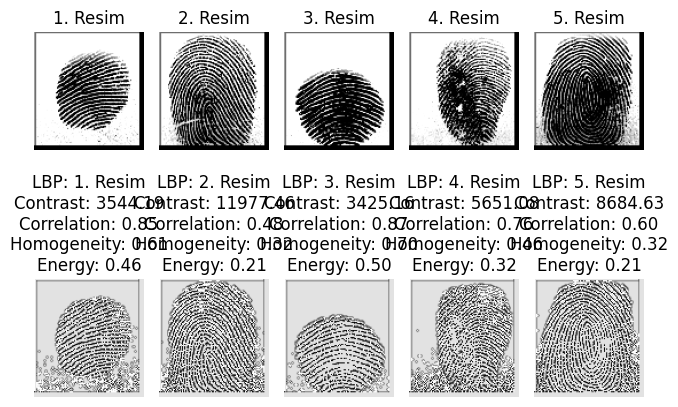

In [8]:
# İlk 5 görüntü
for i in range(5):
    original, lbp, image_file, contrast, correlation, homogeneity, energy = lbp_images[i]

    # Orijinal görüntü
    plt.subplot(2, 5, i + 1)
    plt.imshow(original, cmap='gray')
    plt.title(f'{i + 1}. Resim')  # Kısa başlık
    plt.axis('off')

    # LBP görüntüsü
    plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(lbp, cmap='gray')
    plt.title(f'LBP: {i + 1}. Resim\n'
              f'Contrast: {contrast:.2f}\nCorrelation: {correlation:.2f}\n'
              f'Homogeneity: {homogeneity:.2f}\nEnergy: {energy:.2f}')
    plt.axis('off')

plt.tight_layout()
plt.show(block=True)


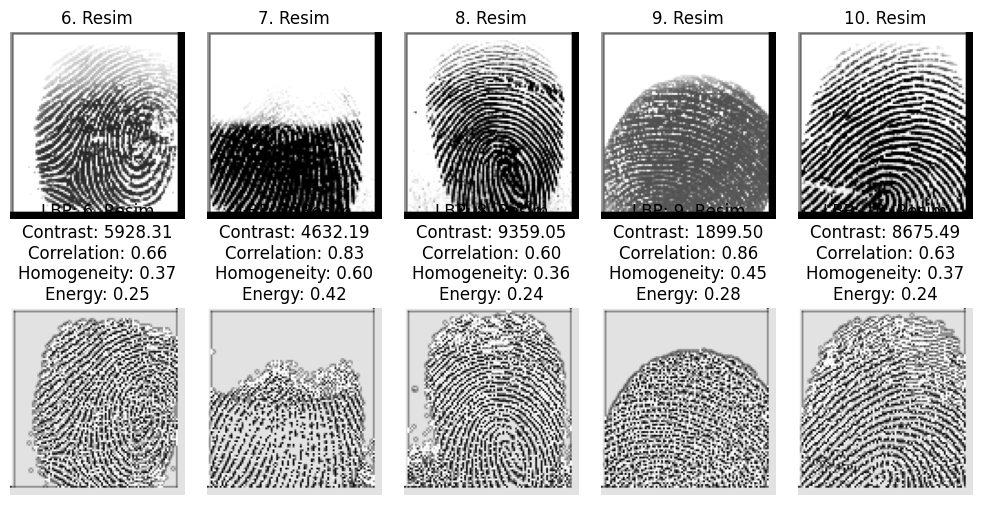

In [9]:
# Son 5 görüntü
plt.figure(figsize=(10, 5))
for i in range(5, 10):
    if i >= num_images_to_show:
        break
    original, lbp, image_file, contrast, correlation, homogeneity, energy = lbp_images[i]

    # Orijinal görüntü
    plt.subplot(2, 5, i - 4)
    plt.imshow(original, cmap='gray')
    plt.title(f'{i + 1}. Resim')
    plt.axis('off')

    # LBP görüntüsü
    plt.subplot(2, 5, i - 4 + 5)
    plt.imshow(lbp, cmap='gray')
    plt.title(f'LBP: {i + 1}. Resim\n'
              f'Contrast: {contrast:.2f}\nCorrelation: {correlation:.2f}\n'
              f'Homogeneity: {homogeneity:.2f}\nEnergy: {energy:.2f}')
    plt.axis('off')

plt.tight_layout()
plt.show(block=True)

In [10]:
# GLCM özniteliklerini terminalde yazdırma
for i in range(num_images_to_show):
    _, _, image_file, contrast, correlation, homogeneity, energy = lbp_images[i]
    print(f'{image_file} - Contrast: {contrast:.2f}\nCorrelation: {correlation:.2f}\n'
          f'Homogeneity: {homogeneity:.2f}\nEnergy: {energy:.2f}\n')

171__M_Left_little_finger.BMP - Contrast: 3544.19
Correlation: 0.85
Homogeneity: 0.61
Energy: 0.46

463__F_Right_ring_finger.BMP - Contrast: 11977.46
Correlation: 0.48
Homogeneity: 0.32
Energy: 0.21

470__F_Right_ring_finger.BMP - Contrast: 3425.16
Correlation: 0.87
Homogeneity: 0.70
Energy: 0.50

367__M_Left_index_finger.BMP - Contrast: 5651.08
Correlation: 0.76
Homogeneity: 0.46
Energy: 0.32

446__M_Right_index_finger.BMP - Contrast: 8684.63
Correlation: 0.60
Homogeneity: 0.32
Energy: 0.21

349__M_Left_index_finger.BMP - Contrast: 5928.31
Correlation: 0.66
Homogeneity: 0.37
Energy: 0.25

127__F_Left_middle_finger.BMP - Contrast: 4632.19
Correlation: 0.83
Homogeneity: 0.60
Energy: 0.42

277__M_Right_ring_finger.BMP - Contrast: 9359.05
Correlation: 0.60
Homogeneity: 0.36
Energy: 0.24

308__M_Left_ring_finger.BMP - Contrast: 1899.50
Correlation: 0.86
Homogeneity: 0.45
Energy: 0.28

334__F_Left_thumb_finger.BMP - Contrast: 8675.49
Correlation: 0.63
Homogeneity: 0.37
Energy: 0.24

